In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Simulation parameters

We first fix the seed to make the notebook reproducible (results with a different seed should be equivalent!). We also fix the reference value for the average, the stddev used to generate Gaussian numbers and the number of samples available.

In [2]:
np.random.seed(1)
average=5.0
stddev=2.0
nframes=1000

# Uncorrelated series

We first generate a time series of independent data

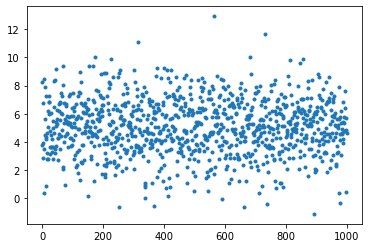

In [3]:
timeseries_uncorr=stddev*np.random.normal(size=nframes)+average
plt.plot(timeseries_uncorr,".")
plt.show()

# Correlated series

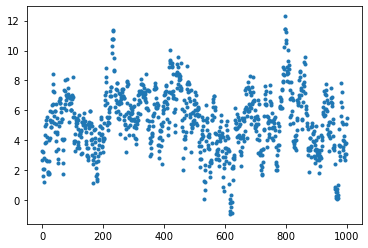

In [4]:
timeseries_corr=[]
x=stddev*np.random.normal()+average
c1=np.exp(-0.1)
for i in range(nframes):
    xnew=stddev*np.random.normal()+average
    x=c1*(x-average)+np.sqrt(1-c1**2)*(xnew-average) + average
    timeseries_corr.append(x)
timeseries_corr=np.array(timeseries_corr)
plt.plot(timeseries_corr,".")
plt.show()

# Autocorrelation function

In [5]:
def autocorr(series):
    autoc=[]
    series=+np.array(series) # take a copy
    series-=np.average(series)
    autoc.append(np.average(series*series))
    for lag in range(1,int(len(series)/2)):
        autoc.append(np.average(series[:-lag]*series[lag:]))
    return np.array(autoc)

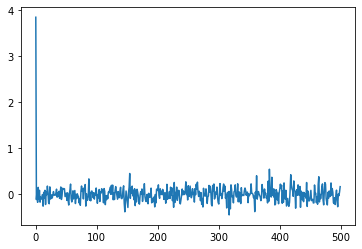

tau_C 0.6783334401360622


In [6]:
ac=autocorr(timeseries_uncorr)
plt.plot(ac)
plt.show()
print("tau_C",np.sum(ac[:100]/ac[0]))

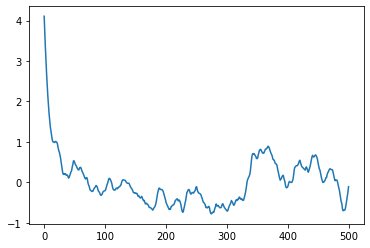

tau_C 12.283196793348452


In [7]:
ac=autocorr(timeseries_corr)
plt.plot(ac)
plt.show()
print("tau_C",np.sum(ac[:100]/ac[0]))

# Blocking

We then split our simulations in consecutive blocks

In [8]:
def plot_blocks(series):
    blocksize=10
    blocks_uncorr=[]
    x=[]
    for i in range(int(len(series)/blocksize)):
        x.append(i*blocksize)
        blocks_uncorr.append(np.average(series[i*blocksize:(i+1)*blocksize]))
    plt.plot(x,blocks_uncorr,".-",label="blocksize="+str(blocksize))
    blocksize=50
    blocks_uncorr=[]
    x=[]
    for i in range(int(len(series)/blocksize)):
        x.append(i*blocksize)
        blocks_uncorr.append(np.average(series[i*blocksize:(i+1)*blocksize]))
    plt.plot(x,blocks_uncorr,"X-",label="blocksize="+str(blocksize))
    blocksize=200
    blocks_uncorr=[]
    x=[]
    for i in range(int(len(series)/blocksize)):
        x.append(i*blocksize)
        blocks_uncorr.append(np.average(series[i*blocksize:(i+1)*blocksize]))
    plt.plot(x,blocks_uncorr,"-",label="blocksize="+str(blocksize))
    plt.legend()
    plt.show()

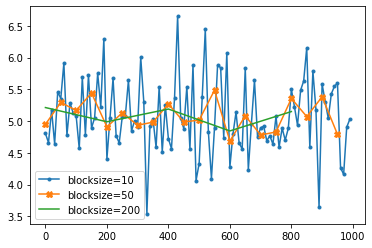

In [9]:
plot_blocks(timeseries_uncorr)

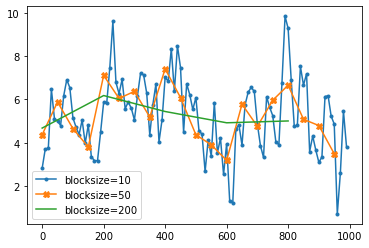

In [10]:
plot_blocks(timeseries_corr)

With large blocks (many data per block), averages are close to the overall average. With small blocks (few data per block), averages are further from the overall average.

# Block analysis

In [11]:
def analyze(timeseries,blocksize):
    nblocks=int(len(timeseries)/blocksize)
    blockav=[]
    for i in range(nblocks):
        blockav.append(np.average(timeseries[i*blocksize:(i+1)*blocksize]))
    return (np.average(blockav),np.std(blockav)/np.sqrt(nblocks-1))

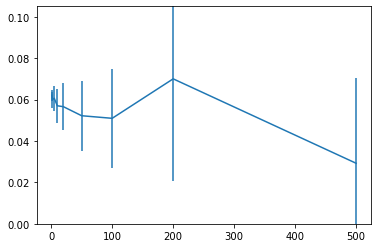

Average: 5.077624952319204


In [12]:
block_error=[]
bs=[]
for blocksize in (1,2,5,10,20,50,100,200,500):
    bs.append(blocksize)
    block_error.append(analyze(timeseries_uncorr,blocksize))
bs=np.array(bs)
block_error=np.array(block_error)
plt.ylim([0,1.5*np.max(block_error[:,1])])
plt.errorbar(bs,block_error[:,1],block_error[:,1]*np.sqrt(2.0/(len(timeseries_uncorr)/bs-1)))
plt.show()
print("Average:",block_error[0,0])

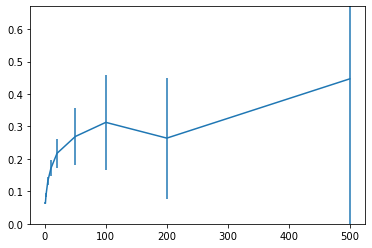

Average: 5.242597874535864


In [13]:
block_error=[]
bs=[]
for blocksize in (1,2,5,10,20,50,100,200,500):
    bs.append(blocksize)
    block_error.append(analyze(timeseries_corr,blocksize))
bs=np.array(bs)
block_error=np.array(block_error)
plt.ylim([0,1.5*np.max(block_error[:,1])])
plt.errorbar(bs,block_error[:,1],block_error[:,1]*np.sqrt(2.0/(len(timeseries_uncorr)/bs-1)))
plt.show()
print("Average:",block_error[0,0])

# Running average (don't do this!)


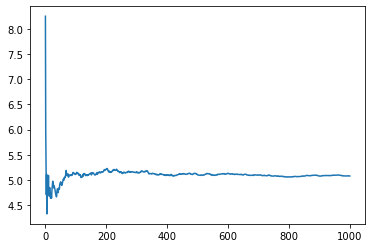

In [14]:
# here's the running average
running=[]
for i in range(len(timeseries_uncorr)):
    running.append(np.average(timeseries_uncorr[:i+1]))
plt.plot(running)
plt.show()

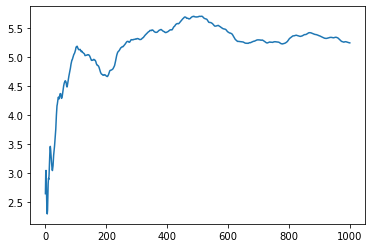

In [15]:
running=[]
for i in range(len(timeseries_corr)):
    running.append(np.average(timeseries_corr[:i+1]))
plt.plot(running)
plt.show()

# A more interesting case: metastable minima

In [16]:
np.random.seed(1)
average=5.0
stddev=2.0
shift=20
nframes=1000

## Uncorrelated samples

As first example, we generate `nframes` samples from a Gaussian distribution with `average` and `stddev`.
Importantly, these samples are independent of each other, so that each new sample provide an independent estimate of the average.

In [17]:
timeseries_easy=stddev*np.random.normal(size=nframes)+average + (np.random.randint(2,size=nframes)-0.5)*shift

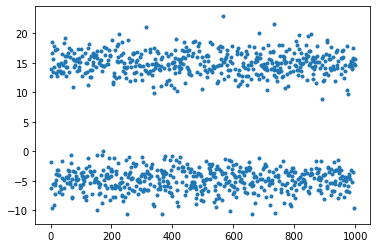

In [18]:
plt.plot(timeseries_easy,".")
plt.show()

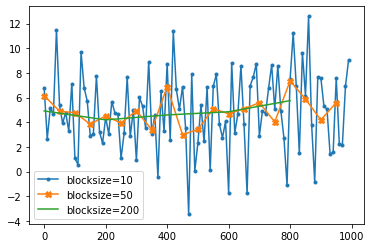

In [19]:
plot_blocks(timeseries_easy)

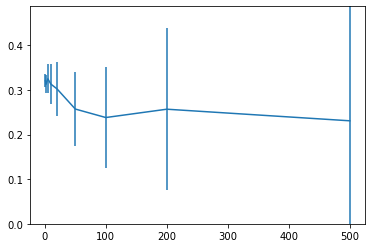

Average: 4.857624952319203


In [20]:
block_error=[]
bs=[]
for blocksize in (1,2,5,10,20,50,100,200,500):
    bs.append(blocksize)
    block_error.append(analyze(timeseries_easy,blocksize))
bs=np.array(bs)    
block_error=np.array(block_error)
#plt.xscale('log')
plt.ylim([0,1.5*np.max(block_error[:,1])])
plt.errorbar(bs,block_error[:,1],block_error[:,1]*np.sqrt(2.0/(len(timeseries_uncorr)/bs-1)))
plt.show()
print("Average:",block_error[0,0])

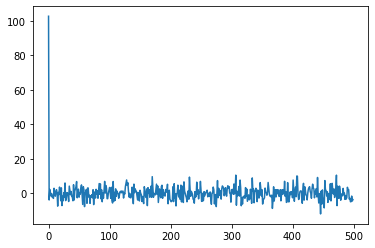

tau_C 0.7616036481309113


In [21]:
ac=autocorr(timeseries_easy)
plt.plot(ac)
plt.show()
print("tau_C",np.sum(ac[:100]/ac[0]))

## Correlated samples

In [22]:
tauc=10
shift=20
timeseries_difficult=stddev*np.random.normal(size=nframes)+average
x=-0.5
for i in range(nframes):
    if(np.random.uniform()<1.0/tauc) and np.random.uniform()>0.5: x=-x
    timeseries_difficult[i]+=x*shift

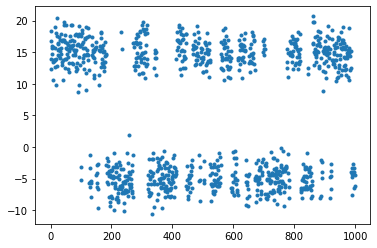

In [23]:
plt.plot(timeseries_difficult,".")
plt.show()

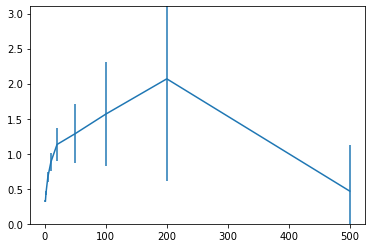

Average: 5.928315158106978


In [24]:
block_error=[]
bs=[]
for blocksize in (1,2,5,10,20,50,100,200,500):
    bs.append(blocksize)
    block_error.append(analyze(timeseries_difficult,blocksize))
bs=np.array(bs)
block_error=np.array(block_error)
#plt.xscale('log')
plt.ylim([0,1.5*np.max(block_error[:,1])])
plt.errorbar(bs,block_error[:,1],block_error[:,1]*np.sqrt(2.0/(len(timeseries_uncorr)/bs-1)))
plt.show()
print("Average:",block_error[0,0])

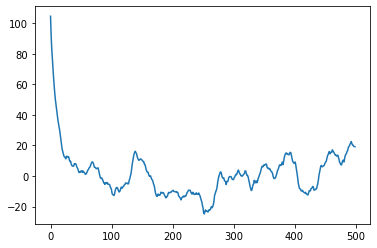

tau_C 12.732582049712232


In [25]:
ac=autocorr(timeseries_difficult)
plt.plot(ac)
plt.show()
print("tau_C",np.sum(ac[:100]/ac[0]))

This latter case is at the limit of being converged. Let's see what happens with only the first 200 frames

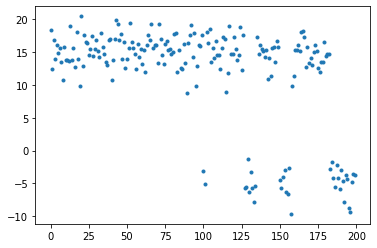

In [26]:
plt.plot(timeseries_difficult[:200],".")
plt.show()

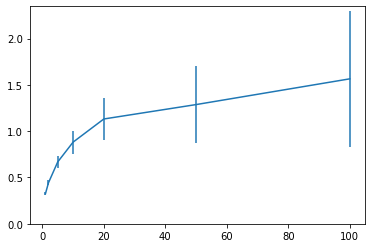

Average: 5.928315158106978


In [27]:
block_error=[]
bs=[]
for blocksize in (1,2,5,10,20,50,100):
    bs.append(blocksize)
    block_error.append(analyze(timeseries_difficult[:],blocksize))
bs=np.array(bs)
block_error=np.array(block_error)
plt.ylim([0,1.5*np.max(block_error[:,1])])
plt.errorbar(bs,block_error[:,1],block_error[:,1]*np.sqrt(2.0/(len(timeseries_uncorr)/bs-1)))
plt.show()
print("Average:",block_error[0,0])

## Summary

The block analysis procedure contains two ingredients:
- data a are first averaged in blocks to make them as independent as possible
- error is estimated from the blocks assuming that they are independent

Since in reality we have no idea to which degree blocks are independent, we should plot the esimated error as a function of the blocksize.

## Alternative manners to compute the error

Computing the error of the mean is not the only way to quantify how different are the blocks we are analyzing.
There are two common alternatives:
- Jack-knife (closely related to leave-one-out)
- Bootstrap

Let's see how they perform on our series

In [28]:
def analyze2(timeseries,blocksize):
    nblocks=int(len(timeseries)/blocksize)
    blockav=[]
    for i in range(nblocks):
        blockav.append(np.average(timeseries[i*blocksize:(i+1)*blocksize]))
    blockav=np.array(blockav)
    
    # error of the mean
    mean_error=(np.average(blockav),np.std(blockav)/np.sqrt(nblocks-1))
    
    # jack-knife
    jack=[]
    for i in range(nblocks):
        jack.append((np.sum(blockav)-blockav[i])/(nblocks-1))
    jack_error=(np.average(jack),np.std(jack)*np.sqrt(nblocks-1))
    
    # bootstrap
    boot=[]
    for i in range(1000):
        boot.append(np.average(blockav[np.int_(np.random.randint(0,nblocks,nblocks))]))
    boot_error=(np.average(boot),np.std(boot)*np.sqrt(nblocks/(nblocks-1)))
    
    return np.array((mean_error,jack_error,boot_error))

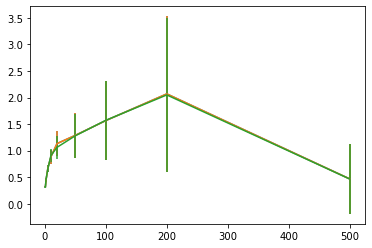

Average: [5.92831516 5.92831516 5.91595923]


In [29]:
block_error=[]
bs=[]
for blocksize in (1,2,5,10,20,50,100,200,500):
    bs.append(blocksize)
    block_error.append(analyze2(timeseries_difficult,blocksize))
block_error=np.array(block_error)
bs=np.array(bs)
plt.errorbar(bs,block_error[:,0,1],block_error[:,0,1]*np.sqrt(2.0/(len(timeseries_uncorr)/bs-1)))
plt.errorbar(bs,block_error[:,1,1],block_error[:,1,1]*np.sqrt(2.0/(len(timeseries_uncorr)/bs-1)))
plt.errorbar(bs,block_error[:,2,1],block_error[:,2,1]*np.sqrt(2.0/(len(timeseries_uncorr)/bs-1)))
plt.show()
print("Average:",block_error[0,:,0])

They give identical results! Indeed, this can be proven exactly for any analysis that correspond to taking an average of a time series. In other words, if you are computing averages, there is no need to think about more sophisticated error estimators. The error of the mean is the thing to do.

## Computing observables that depend non-linearly on averages

An example for the case above would be the free energy difference between states with `x>average` and with `x<average`. In both cases, by design, we expect the difference to be zero (the distribution is symmetric).

In [30]:
def enediff(A):
    return np.log((A+1e-50)/(1-A+1e-50))

def analyze3(timeseries,blocksize):
    nblocks=int(len(timeseries)/blocksize)
    blockav=[]
    for i in range(nblocks):
        blockav.append(np.average(timeseries[i*blocksize:(i+1)*blocksize]>average))
    blockav=np.array(blockav)
    
    # error of the mean
    mean_error=(np.average(enediff(blockav)),np.std(enediff(blockav))/np.sqrt(nblocks-1))
    
    # jack-knife
    jack=[]
    for i in range(nblocks):
        jack.append((np.sum(blockav)-blockav[i])/(nblocks-1))
    jack=np.array(jack)
    jack_error=(np.average(enediff(jack)),np.std(enediff(jack))*np.sqrt(nblocks-1))
    
    # bootstrap
    boot=[]
    for i in range(1000):
        boot.append(np.average(blockav[np.int_(np.random.randint(0,nblocks,nblocks))]))
    boot=np.array(boot)
    boot_error=(np.average(enediff(boot)),np.std(enediff(boot))*np.sqrt(nblocks/(nblocks-1)))
    
    return np.array((mean_error,jack_error,boot_error))

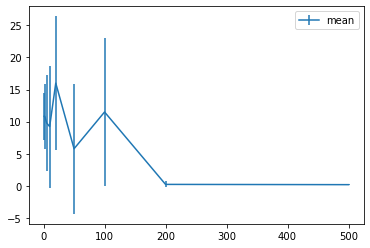

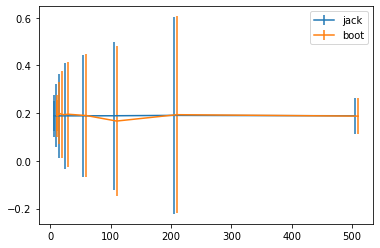

Average: [10.82214994  0.18855687  0.19018429]


In [31]:
block_error=[]
bs=[]
for blocksize in (1,2,5,10,20,50,100,200,500):
    bs.append(blocksize)
    block_error.append(analyze3(timeseries_difficult,blocksize))
block_error=np.array(block_error)
bs=np.array(bs)
plt.errorbar(bs,block_error[:,0,0],block_error[:,0,1],label="mean")
plt.legend()
plt.show()
plt.errorbar(bs+5,block_error[:,1,0],block_error[:,1,1],label="jack")
plt.errorbar(bs+10,block_error[:,2,0],block_error[:,2,1],label="boot")
plt.legend()
plt.show()
print("Average:",block_error[0,:,0])

## Autocorrelation times

In [32]:
def compare_autoc_time(series):
    ac=autocorr(series)
    p=[]
    for i in range(len(ac)):
        p.append(np.sum(ac[:i])/ac[0])
    p=np.array(p)
    plt.plot(p)
    p=[]
    for i in range(len(ac)):
        p.append(np.sum(ac[:i] * np.linspace(1,0,i))/ac[0])
    p=np.array(p)
    plt.plot(p)

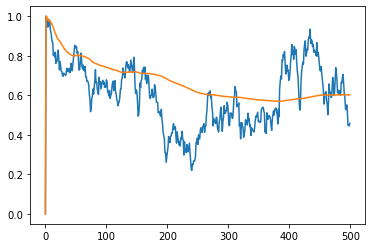

In [33]:
compare_autoc_time(timeseries_uncorr)

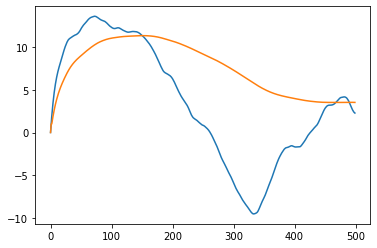

In [34]:
compare_autoc_time(timeseries_corr)

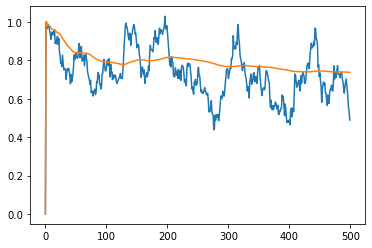

In [35]:
compare_autoc_time(timeseries_easy)

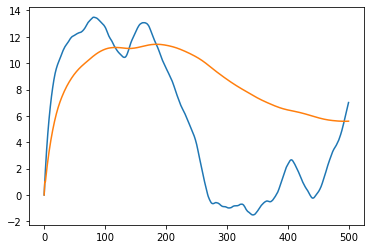

In [36]:
compare_autoc_time(timeseries_difficult)